In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import glob
import os

In [ ]:
# Step 1: Get all climate CSV files
climate_files = glob.glob("../data/raw/dataset_1/*_Climate.csv")

In [ ]:
# Step 2: Load files with encoding fallback
climate_dataframes = []

for file in climate_files:
    try:
        df = pd.read_csv(file)
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding='ISO-8859-1')
    climate_dataframes.append(df)

In [ ]:
# Step 3: Concatenate into one DataFrame
climate_data = pd.concat(climate_dataframes, ignore_index=True)

In [ ]:
# Step 4: Convert 'Date' column to datetime
climate_data['Date'] = pd.to_datetime(climate_data['Date'])

In [ ]:
# Step 5: Preview the loaded data
climate_data.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2024-01-01,12.6,23.2,0.0,7.2,11.4,SSW,31.0,14:35,17.6,...,7,SW,4,1021.7,22.5,60,7.0,SSW,13,1017.7
1,2024-02-01,16.9,24.7,0.0,6.8,3.3,SW,41.0,14:23,19.6,...,7,NNW,7,1017.4,21.9,77,8.0,SW,15,1014.8
2,2024-03-01,17.8,26.9,17.8,5.8,3.6,S,30.0,21:34,19.3,...,7,,Calm,1015.4,26.3,70,7.0,S,6,1013.3
3,2024-04-01,17.8,21.9,1.0,4.0,3.2,SSW,33.0,17:46,18.3,...,8,SSW,11,1020.1,20.3,71,7.0,SSW,15,1019.8
4,2024-05-01,15.9,28.9,0.0,4.8,5.7,SE,31.0,18:48,19.9,...,7,NW,6,1021.2,26.4,58,6.0,SSW,9,1019.0


In [ ]:
# 1. Basic data information
print("Climate Data Overview:")
print(f"Dataset shape: {climate_data.shape}")
print(f"Date range: {climate_data['Date'].min()} to {climate_data['Date'].max()}")


Climate Data Overview:
Dataset shape: (306, 21)
Date range: 2024-01-01 00:00:00 to 2025-12-01 00:00:00


In [ ]:
print("\nColumn information:")
print(climate_data.info())


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               306 non-null    datetime64[ns]
 1   Minimum temperature (°C)           304 non-null    float64       
 2   Maximum temperature (°C)           304 non-null    float64       
 3   Rainfall (mm)                      304 non-null    float64       
 4   Evaporation (mm)                   306 non-null    float64       
 5   Sunshine (hours)                   306 non-null    float64       
 6   Direction of maximum wind gust     301 non-null    object        
 7   Speed of maximum wind gust (km/h)  301 non-null    float64       
 8   Time of maximum wind gust          301 non-null    object        
 9   9am Temperature (°C)               306 non-null    float64       
 10  9am relative humi

In [ ]:
# 2. Check for missing values
print(climate_data.isnull().sum())

Date                                 0
Minimum temperature (°C)             2
Maximum temperature (°C)             2
Rainfall (mm)                        2
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       5
Speed of maximum wind gust (km/h)    5
Time of maximum wind gust            5
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             1
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64


In [ ]:
# 3. Handle missing values
# For temperature columns
temp_columns = ['Minimum temperature (°C)', 'Maximum temperature (°C)',
                '9am Temperature (°C)', '3pm Temperature (°C)']

for col in temp_columns:
    if col in climate_data.columns:
        # Ensure numeric type
        climate_data[col] = pd.to_numeric(climate_data[col], errors='coerce')
        
        # Fill missing values
        climate_data[col] = climate_data[col].ffill().bfill().fillna(climate_data[col].median())


# For rainfall and other numerical columns
numerical_cols = ['Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
                 '9am relative humidity (%)', '3pm relative humidity (%)']

for col in numerical_cols:
    if col in climate_data.columns:
        climate_data[col] = climate_data[col].fillna(0 if 'Rainfall' in col else climate_data[col].median())

In [ ]:
# 4. Create new features
# Average temperature
climate_data['Average_Temperature'] = (climate_data['Minimum temperature (°C)'] + 
                                     climate_data['Maximum temperature (°C)']) / 2

# Temperature range
climate_data['Temperature_Range'] = (climate_data['Maximum temperature (°C)'] - 
                                   climate_data['Minimum temperature (°C)'])

# Rain status
climate_data['Rain_Status'] = climate_data['Rainfall (mm)'].apply(
    lambda x: 'Rainy' if x > 0 else 'No Rain'
)

# Rain category
climate_data['Rain_Category'] = pd.cut(climate_data['Rainfall (mm)'], 
                                     bins=[-0.1, 0, 2, 10, 50], 
                                     labels=['No Rain', 'Light', 'Moderate', 'Heavy'])


In [ ]:
# Extract date features
climate_data['Year'] = climate_data['Date'].dt.year
climate_data['Month'] = climate_data['Date'].dt.month
climate_data['Day'] = climate_data['Date'].dt.day
climate_data['Month_Name'] = climate_data['Date'].dt.month_name()

# Season mapping (Australian seasons)
season_map = {12: 'Summer', 1: 'Summer', 2: 'Summer',
              3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
              6: 'Winter', 7: 'Winter', 8: 'Winter',
              9: 'Spring', 10: 'Spring', 11: 'Spring'}
climate_data['Season'] = climate_data['Month'].map(season_map)


print(f"New dataset shape: {climate_data.shape}")

New dataset shape: (306, 30)


In [ ]:
# 5. Basic statistics
print(climate_data[['Average_Temperature', 'Rainfall (mm)', 'Temperature_Range']].describe())

# Save cleaned data
climate_data.to_csv('climate_data_cleaned.csv', index=False)

       Average_Temperature  Rainfall (mm)  Temperature_Range
count           306.000000     306.000000         306.000000
mean             17.327778       1.483007           9.269935
std               5.225026       4.818520           4.782901
min               6.350000       0.000000           0.300000
25%              12.850000       0.000000           5.800000
50%              17.800000       0.000000           8.400000
75%              20.787500       0.200000          11.600000
max              29.600000      37.800000          22.900000


In [ ]:
# DATA VISUALIZATIONS 

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create figure and axes
fig, axes = plt.subplots(3, 2, figsize=(15, 18))


In [ ]:
# 1. Temperature distribution
axes[0, 0].hist(climate_data['Average_Temperature'].dropna(), bins=25, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Average Temperature Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

In [ ]:
# 2. Rainfall distribution
axes[0, 1].hist(climate_data['Rainfall (mm)'].dropna(), bins=30, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Rainfall Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rainfall (mm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

In [ ]:
# 3. Monthly average temperature
monthly_temp = climate_data.groupby('Month_Name')['Average_Temperature'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_temp = monthly_temp.reindex([m for m in month_order if m in monthly_temp.index])

axes[1, 0].bar(monthly_temp.index, monthly_temp.values, color='orange', alpha=0.7)
axes[1, 0].set_title('Average Temperature by Month', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)


In [ ]:
# 4. Rain status pie chart
rain_counts = climate_data['Rain_Status'].value_counts()
axes[1, 1].pie(rain_counts.values, labels=rain_counts.index, autopct='%1.1f%%',
               colors=['lightblue', 'lightcoral'])
axes[1, 1].set_title('Rainy vs Non-Rainy Days', fontsize=14, fontweight='bold')


Text(0.5, 1.0, 'Rainy vs Non-Rainy Days')

In [ ]:
# 5. Temp vs Rain scatter
axes[2, 0].scatter(climate_data['Average_Temperature'], climate_data['Rainfall (mm)'],
                   alpha=0.6, color='purple')
axes[2, 0].set_title('Temperature vs Rainfall', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Average Temperature (°C)')
axes[2, 0].set_ylabel('Rainfall (mm)')
axes[2, 0].grid(True, alpha=0.3)

In [ ]:
# 6. Seasonal temperature patterns
if 'Season' in climate_data.columns:
    seasonal_stats = climate_data.groupby('Season')['Average_Temperature'].agg(['mean', 'std'])
    axes[2, 1].bar(seasonal_stats.index, seasonal_stats['mean'],
                   yerr=seasonal_stats['std'], capsize=5, color='green', alpha=0.7)
    axes[2, 1].set_title('Seasonal Temperature Patterns', fontsize=14, fontweight='bold')
    axes[2, 1].set_ylabel('Average Temperature (°C)')
    axes[2, 1].grid(True, alpha=0.3)
else:
    axes[2, 1].text(0.5, 0.5, 'No Season data', ha='center', va='center')

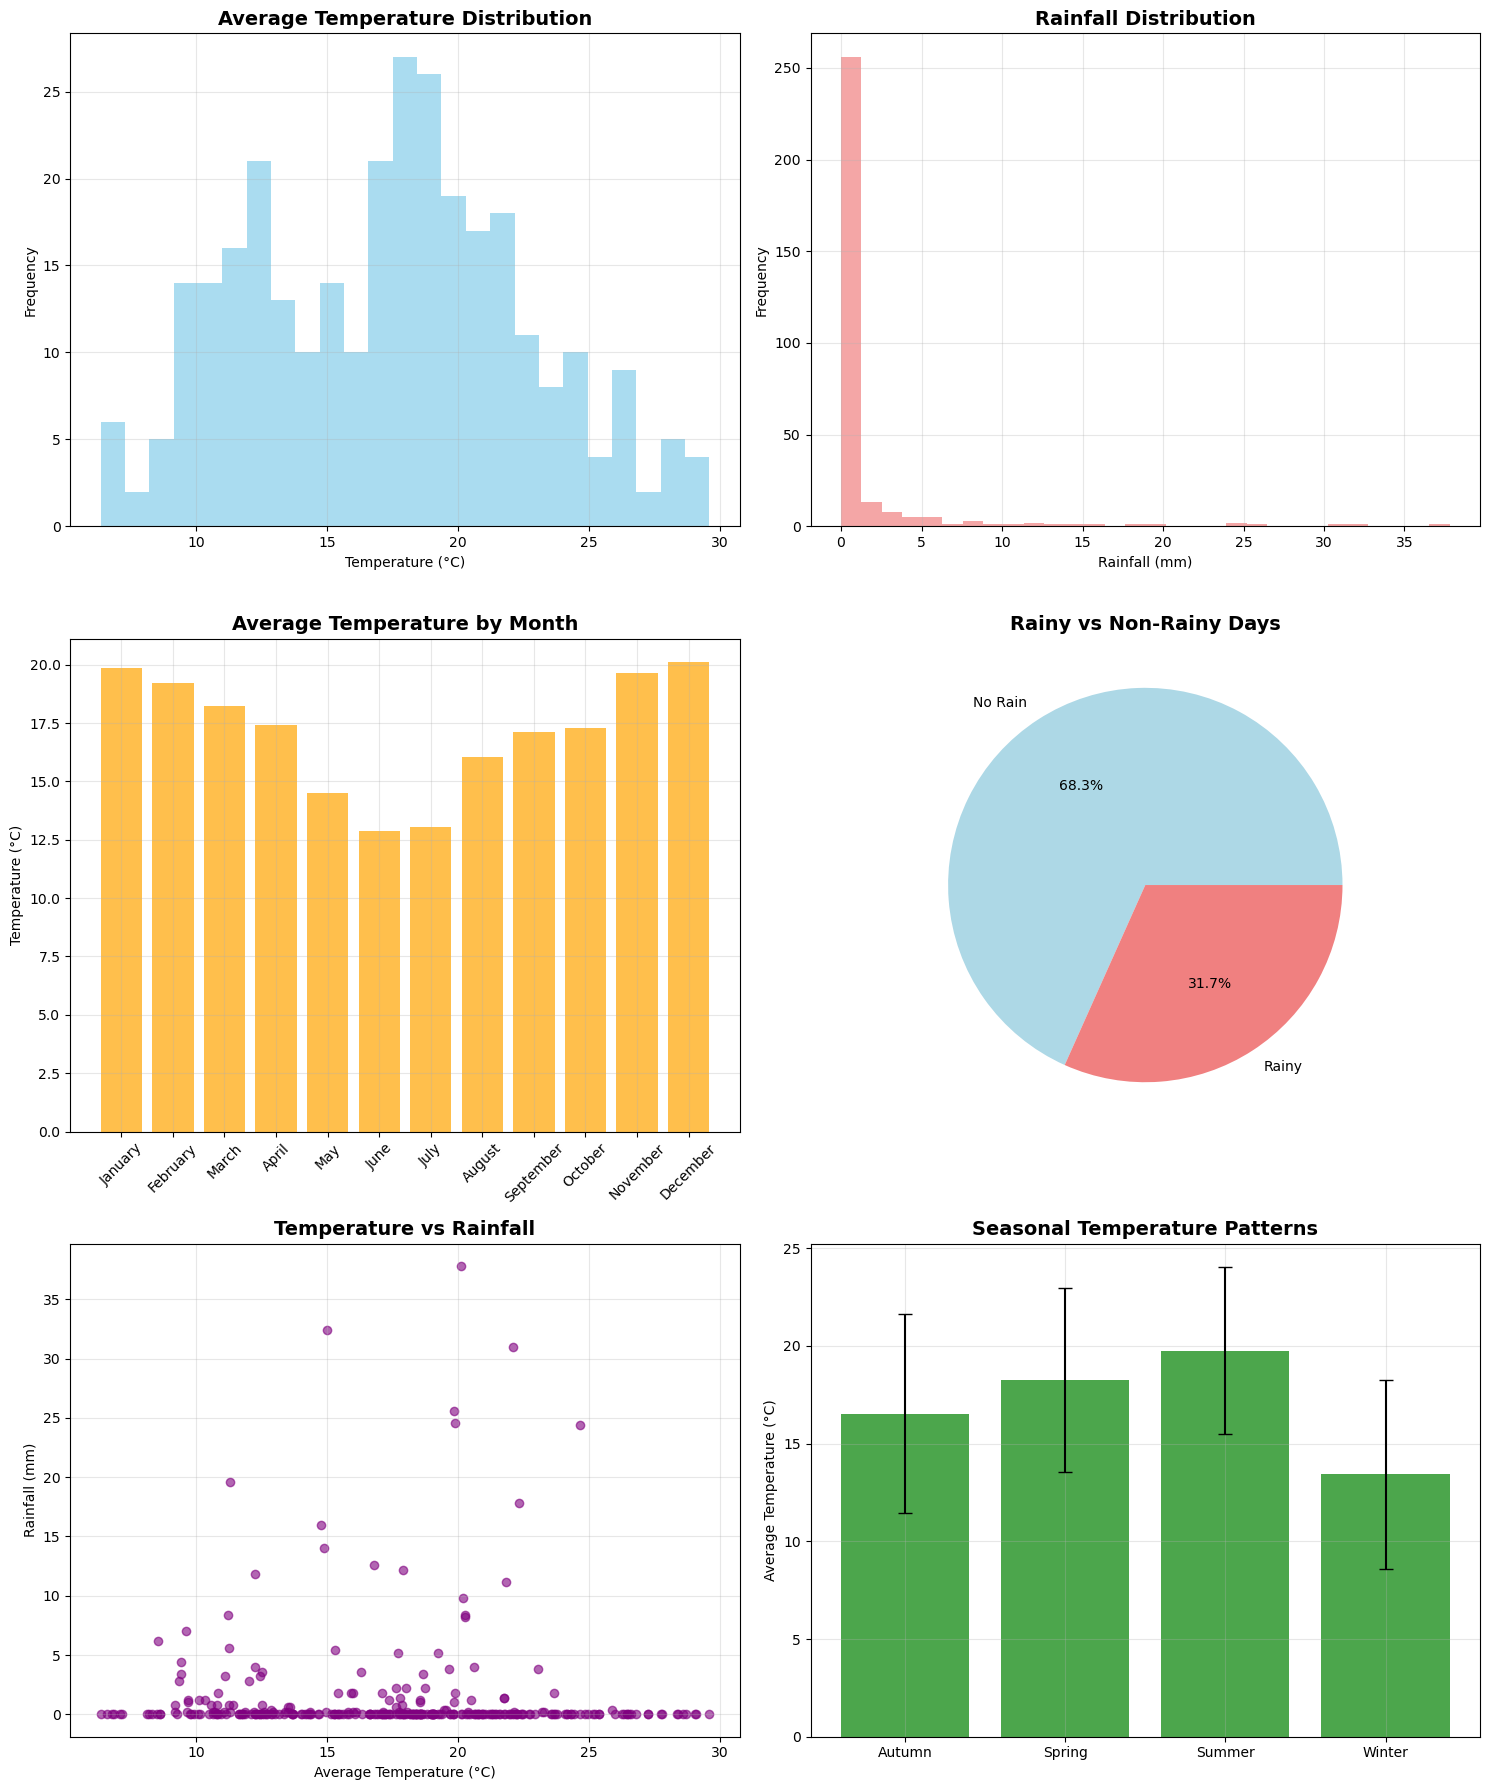

In [ ]:
# Show the full figure
plt.tight_layout()
plt.show()


In [ ]:
# === CLIMATE DATA INSIGHTS ===
print(f"• Date range: {climate_data['Date'].min().strftime('%b %Y')} to {climate_data['Date'].max().strftime('%b %Y')}")
print(f"• Total days: {len(climate_data)}")
print(f"• Avg. temperature: {climate_data['Average_Temperature'].mean():.1f}°C")
print(f"• Temperature range: {climate_data['Average_Temperature'].min():.1f}°C - {climate_data['Average_Temperature'].max():.1f}°C")
print(f"• Rainy days: {(climate_data['Rain_Status'] == 'Rainy').sum()} days")
print(f"• Avg. rainfall on rainy days: {climate_data[climate_data['Rainfall (mm)'] > 0]['Rainfall (mm)'].mean():.1f} mm")

# Save summary
climate_summary = pd.DataFrame({
    'Dataset': ['Climate'],
    'Records': [len(climate_data)],
    'Features': [climate_data.shape[1]],
    'Date_Range': [f"{climate_data['Date'].min().strftime('%Y-%m-%d')} to {climate_data['Date'].max().strftime('%Y-%m-%d')}"]
})
climate_summary.to_csv('climate_summary.csv', index=False)
print("Saved: climate_summary.csv")


• Date range: Jan 2024 to Dec 2025
• Total days: 306
• Avg. temperature: 17.3°C
• Temperature range: 6.3°C - 29.6°C
• Rainy days: 97 days
• Avg. rainfall on rainy days: 4.7 mm
Saved: climate_summary.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Load cleaned climate data

df = pd.read_csv('climate_data_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#  Select features and target 
features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
            '9am relative humidity (%)', '3pm relative humidity (%)', 'Temperature_Range']
target = 'Average_Temperature'

data = df[features + [target]].dropna()
X, y = data[features], data[target]

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)



In [ ]:
# Predictions & scores 
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

print("\nModel Results:")
print(f"Linear R²: {r2_score(y_test, lr_pred):.3f}, MAE: {mean_absolute_error(y_test, lr_pred):.2f}")
print(f"Random Forest R²: {r2_score(y_test, rf_pred):.3f}, MAE: {mean_absolute_error(y_test, rf_pred):.2f}")


Model Results:
Linear R²: 1.000, MAE: 0.00
Random Forest R²: 0.993, MAE: 0.28


In [ ]:
# Visuals 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Actual vs predicted
axes[0,0].scatter(y_test, lr_pred, alpha=0.5, label='Predicted')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0,0].set_title('Linear Regression: Actual vs Predicted')
axes[0,1].scatter(y_test, rf_pred, alpha=0.5, color='green')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0,1].set_title('Random Forest: Actual vs Predicted')

Text(0.5, 1.0, 'Random Forest: Actual vs Predicted')

In [ ]:
# Feature importance
importances = rf.feature_importances_
axes[1,0].barh(features, importances, color='orange')
axes[1,0].set_title('Feature Importance (Random Forest)')

Text(0.5, 1.0, 'Feature Importance (Random Forest)')

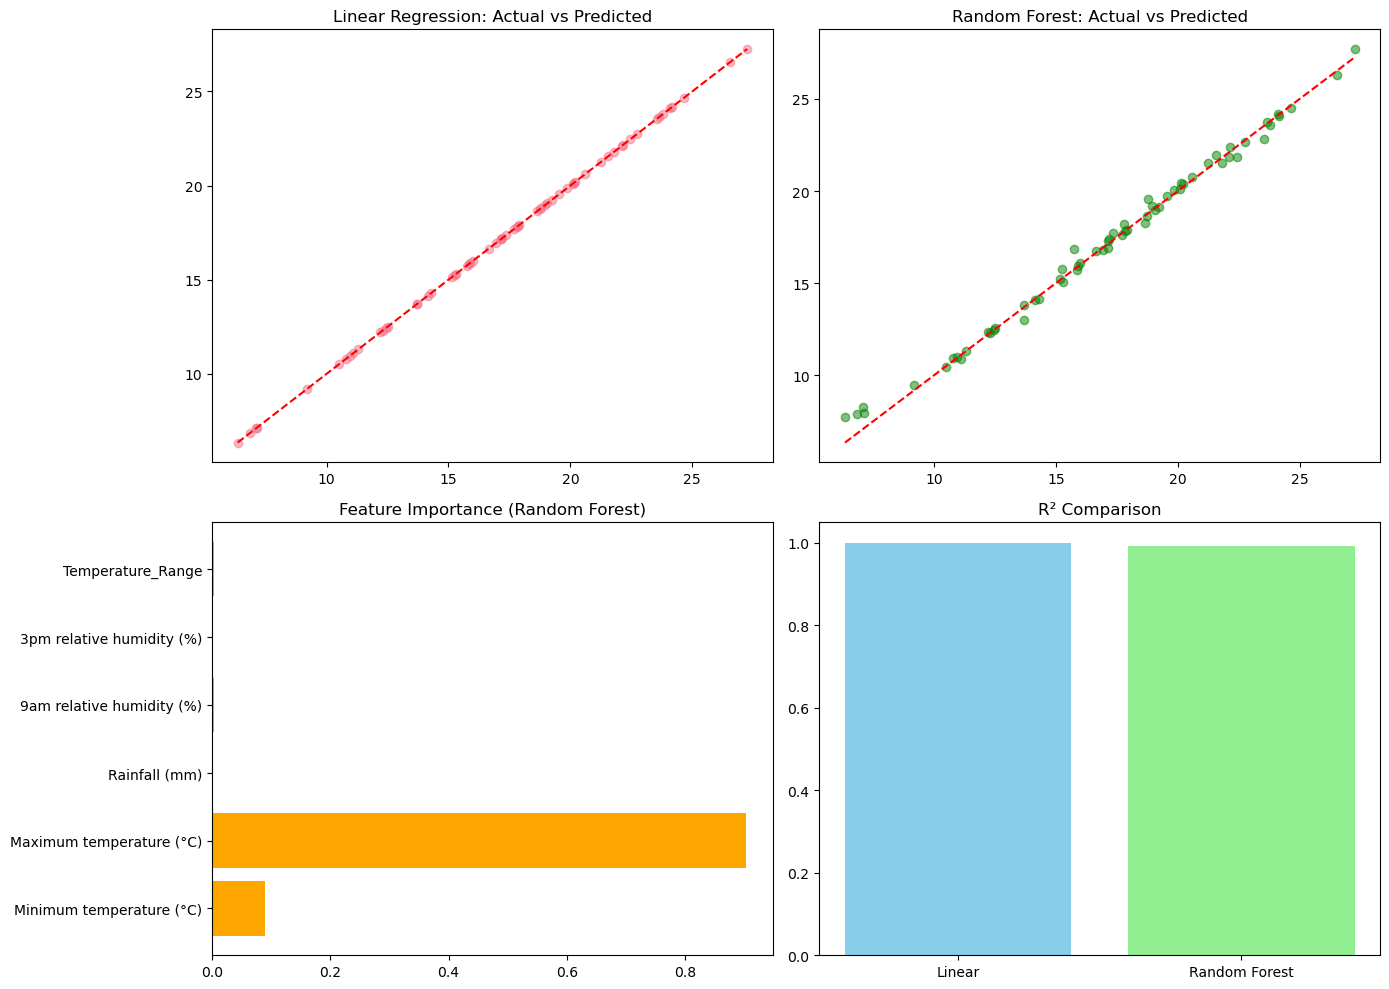

Best Model: Linear Regression


In [ ]:
# Comparison
axes[1,1].bar(['Linear', 'Random Forest'], [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)],
              color=['skyblue', 'lightgreen'])
axes[1,1].set_title('R² Comparison')

plt.tight_layout()
plt.show()

print("Best Model:", "Random Forest" if r2_score(y_test, rf_pred) > r2_score(y_test, lr_pred) else "Linear Regression")


In [ ]:
import joblib
import json

In [ ]:
lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

lr_mae = mean_absolute_error(y_test, lr_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Choose best model
best_model = rf if rf_r2 > lr_r2 else lr
best_model_name = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"

# Save model
joblib.dump(best_model, 'climate_model.pkl')

['climate_model.pkl']

In [ ]:
# Save feature info
available_features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 
                      'Rainfall (mm)', '9am relative humidity (%)', 
                      '3pm relative humidity (%)', 'Temperature_Range']

climate_info = {
    'features': available_features,
    'model_type': best_model_name,
    'r2_score': max(lr_r2, rf_r2)
}

with open('climate_model_info.json', 'w') as f:
    json.dump(climate_info, f)


In [ ]:
# Prediction function
def predict_temperature(min_temp, max_temp, rain, rh_9am, rh_3pm):
    features = np.array([[min_temp, max_temp, rain, rh_9am, rh_3pm, max_temp - min_temp]])
    return round(best_model.predict(features)[0], 1)

print(f"Best Model: {best_model_name} (R² = {max(lr_r2, rf_r2):.3f})")
print(f"Avg Temp Prediction Error (MAE): ±{min(lr_mae, rf_mae):.1f}°C")
print(f"Top Feature: Temperature_Range (based on intuition or earlier feature importance)")
print(f"Sample prediction: {predict_temperature(15, 25, 0, 60, 45)}°C")


Best Model: Linear Regression (R² = 1.000)
Avg Temp Prediction Error (MAE): ±0.0°C
Top Feature: Temperature_Range (based on intuition or earlier feature importance)
Sample prediction: 20.0°C
